# Modeling, including 50-50 ratio of closed-to-open questions

NLP applied to Kaggle dataset:
https://www.kaggle.com/datasets/stackoverflow/stacksample

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import set_style

from ast import literal_eval

set_style("whitegrid")

## Read in part of the data

In [2]:
questions = pd.read_csv("archive/questions_cleaned.csv", nrows=100000, 
                        converters={'cleaned_body': literal_eval})

In [3]:
questions.sample(5, random_state=234)

,Unnamed: 0,Unnamed: 0.1,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body,body_text,cleaned_body
23390,23390,23390,1265190,147800.0,2009-08-12T09:35:05Z,NaN,20,Django annotate() multiple times causes wrong ...,<p>Django has the great new annotate() functio...,Django has the great new annotate() function f...,"[Django, great, new, annotate, function, query..."
96923,96923,96923,4082150,495246.0,2010-11-02T21:13:10Z,NaN,2,JSF 2.0 + Icefaces 2.0.0 Beta2 and Tomcat 7 fa...,<p>I have an existing JSF 2.0 project working ...,I have an existing JSF 2.0 project working on ...,"[exist, JSF, 2.0, project, work, Tomcat, 7.0.4..."
90312,90312,90312,3847040,289995.0,2010-10-02T18:34:38Z,NaN,3,Where can you download a chm version of the JP...,<p>I'm tired of navigating Oracle's joke of a ...,I'm tired of navigating Oracle's joke of a web...,"[tired, navigate, Oracle, joke, website, JPA, ..."
86983,86983,86983,3728830,391104.0,2010-09-16T16:46:22Z,NaN,25,C# - What will I miss if I start with .NET 2.0?,"<p>I got a book named ""Pro C# 2005 and the .NE...","I got a book named ""Pro C# 2005 and the .NET 2...","[get, book, name, pro, c, 2005, .net, 2.0, Pla..."
37271,37271,37271,1855850,220388.0,2009-12-06T16:50:34Z,NaN,0,Problem with MySQL query,"<p>I have three tables (<em>user</em>, <em>fri...","I have three tables (user, friends, posts) and...","[table, user, friend, post, user, user1, user2..."


## Report number of closed and open questions in the dataset

In [4]:
count = 0
for i in range(0,np.shape(questions)[0]):
    if pd.isna(questions.iloc[i].ClosedDate):
        count = count+1
        
print("Number of closed questions:", count)
print("Number of open questions:", np.shape(questions)[0] - count)

Number of closed questions: 96669
Number of open questions: 3331


Let's define a new column of 0s and 1s that indicates if the question is still open (0) or if it has been closed (1).

In [5]:
questions['Closed'] = 1

for i in range(0,np.shape(questions)[0]):
    if pd.isna(questions.iloc[i].ClosedDate):
        questions['Closed'].iloc[i] = 0

questions.head(5)

D:\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Unnamed: 0,Unnamed: 0.1,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body,body_text,cleaned_body,Closed
0,0,0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,I've written a database generation script in S...,"[write, database, generation, script, SQL, wan...",0
1,1,1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,Are there any really good tutorials explaining...,"[good, tutorial, explain, branching, merge, Ap...",1
2,2,2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,Has anyone got experience creating SQL-based A...,"[get, experience, create, SQL, base, ASP.NET, ...",0
3,3,3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...,This is something I've pseudo-solved many time...,"[pseudo, solve, time, find, solution, stick, p...",0
4,4,4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,I have a little game written in C#. It uses a ...,"[little, game, write, C, use, database, end, t...",0


## Manually construct a dataset with a different ratio of closed-to-open questions

In [6]:
open_questions = questions[pd.isna(questions['ClosedDate'])].copy()
np.shape(open_questions)[0]

96669

In [7]:
closed_questions = questions[pd.notna(questions['ClosedDate'])].copy()
np.shape(closed_questions)[0]

3331

In [8]:
halfset = pd.concat([open_questions[0:2000], closed_questions[0:2000]])

In [9]:
halfset.sample(5)

,Unnamed: 0,Unnamed: 0.1,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body,body_text,cleaned_body,Closed
41239,41239,41239,2025730,165520.0,2010-01-08T05:30:45Z,2013-05-05T19:21:54Z,25,Why is COBOL still a preferred language in the...,<p>Even though we have languages like <code>C+...,"Even though we have languages like C++, Java, ...","[language, like, C++, Java, Python, etc, COBOL...",1
1501,1501,1501,126430,3408.0,2008-09-24T10:39:12Z,NaN,17,Is it possible to change the natural order of ...,<p>Is it possible to change the natural order ...,Is it possible to change the natural order of ...,"[possible, change, natural, order, column, Pos...",0
10999,10999,10999,687720,74894.0,2009-03-26T21:56:55Z,2014-08-22T11:53:44Z,6,Open source survey/questionnaire engine for Java,<p>Is there an open source survey engine for j...,Is there an open source survey engine for java...,"[open, source, survey, engine, java, allow, br...",1
4632,4632,4632,330700,42118.0,2008-12-01T12:35:36Z,2013-08-22T17:40:13Z,1,Can you use SIMBL to develop a plug-in for the...,<p>Can you use SIMBL to develop a plug-in for ...,Can you use SIMBL to develop a plug-in for the...,"[use, SIMBL, develop, plug, iPhone, Safari]",1
1769,1769,1769,145880,12874.0,2008-09-28T13:53:16Z,NaN,18,How do I get a stack trace in OCaml?,<p>The Objective Caml language will only produ...,The Objective Caml language will only produce ...,"[Objective, Caml, language, produce, stack, tr...",0


## Define dataset for the rest of the notebook

In [10]:
#dataset = questions
dataset = halfset

## Secondary cleaning

Do a small amount of secondary cleaning to remove non-ascii characters, single digit numbers, extraneous punctuation, and short (1 to 3 character) words that survived the first cleaning.

In [11]:
import re

In [12]:
def clean_text(text):

    for i in range(0,len(text)):
        # remove the random non-ascii characters
        text[i] = text[i].encode("ascii", "ignore").decode()
        
        # remove numbers
        text[i] = re.sub(r'[0-9]+', '', text[i])
        
        # remove anything that isn't a word or whitespace
        text[i] = re.sub(r'[^\w\s]', '', text[i])    
        
        # remove short words with 1 to 3 characters
        shortword = re.compile(r'\W*\b\w{1,3}\b')
        text[i] = shortword.sub('', text[i])
        
        
    # some of the above re calls replaced things with empty strings, so now let's remove those    
    while("" in text) :
        text.remove("")    
        
    return text

In [13]:
dataset['cleaned_body'] = list(map(clean_text, dataset.cleaned_body))

In [14]:
dataset.head(3)

,Unnamed: 0,Unnamed: 0.1,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body,body_text,cleaned_body,Closed
0,0,0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,I've written a database generation script in S...,"[write, database, generation, script, want, ex...",0
2,2,2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,Has anyone got experience creating SQL-based A...,"[experience, create, base, ASPNET, site, provi...",0
3,3,3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...,This is something I've pseudo-solved many time...,"[pseudo, solve, time, find, solution, stick, p...",0


In [15]:
dataset[['Id', 'Score', 'Title', 'Body', 'body_text', 'cleaned_body', 'Closed']].sample(3, random_state=151)

,Id,Score,Title,Body,body_text,cleaned_body,Closed
1983,161430,2,Unit Testing: Maven or Eclipse?,<p>I am not really familiar with Maven program...,I am not really familiar with Maven program bu...,"[familiar, Maven, program, Eclipse, Unit, test...",0
7541,508370,22,quaternion libraries in C/C++,<p>Any good libraries for <em>quaternion</em> ...,Any good libraries for quaternion calculations...,"[good, library, quaternion, calculation, note,...",1
1992,162310,8,What is the role of Spring in Struts + Spring ...,<p>What role is Spring taking in Struts + Spri...,What role is Spring taking in Struts + Spring ...,"[role, Spring, take, Struts, Spring, Hibernate]",0


# Logistic regression with our bag of words

Here, we implement a logistic regression model that takes, as features, the words in a given question and outputs a prediction of whether or not that question will be closed or open.

## Split all of our data into training and testing blocks

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
from sklearn.linear_model import LogisticRegression
import sklearn.model_selection
import sklearn.preprocessing as preproc
from sklearn.feature_extraction import text

In [18]:
training_data, test_data = sklearn.model_selection.train_test_split(dataset.copy(), shuffle=True, 
                                                                    test_size = 0.3, random_state=961,
                                                                    stratify = dataset.Closed)

In [19]:
print(training_data.shape)
print(test_data.shape)

(2800, 12)
(1200, 12)


Note that the stratify keyword preserves the number of 'Closed' questions in the training and test sets.

In [20]:
print("Number of open (0) and closed (1) questions in total:\n", dataset.Closed.value_counts(normalize=True))
print("Number of open (0) and closed (1) questions in training data:\n", training_data.Closed.value_counts(normalize=True))
print("Number of open (0) and closed (1) questions in test data:\n", test_data.Closed.value_counts(normalize=True))

Number of open (0) and closed (1) questions in total:
 0    0.5
1    0.5
Name: Closed, dtype: float64
Number of open (0) and closed (1) questions in training data:
 1    0.5
0    0.5
Name: Closed, dtype: float64
Number of open (0) and closed (1) questions in test data:
 1    0.5
0    0.5
Name: Closed, dtype: float64


Make the model and fit it to our training data. Again, we're just making a bag of words (and not a bag of n-grams).

In [21]:
bow_transform = CountVectorizer(tokenizer=lambda doc: doc, ngram_range=[1,1], lowercase=False) 

X_tr_bow = bow_transform.fit_transform(training_data['cleaned_body'])

Check the number of unique words.

In [23]:
len(bow_transform.vocabulary_)

14868

This method shows us the actual "words" we've put in the "training" bag.

In [24]:
bow_transform.get_feature_names_out()

array(['ABCDEFGHIJKLMNOPQRSTUVWXYZ', 'ABCpdf', 'ABORT', ..., 'zsequencen',
       'zzzz', 'zzzzz'], dtype=object)

And this methods shows us how to map from a word to the index in the bag "array" where that word appears, e.g. 'Nicole' appears at index 2,554. Note these are *not* word counts.

In [25]:
first10pairs = {k: bow_transform.vocabulary_[k] for k in list(bow_transform.vocabulary_)[:10]}

print(first10pairs)

{'Nicole': 2554, 'Sullivan': 3611, 'Object': 2613, 'orient': 10730, 'grid': 8024, 'hate': 8129, 'term': 13495, 'find': 7512, 'good': 7973, 'experience': 7291}


This is the shape of our training data. Here, 2,800 rows (one row for each StackOverflow question in the training set) and 14,868 columns (one column for each word in our vocabulary).

In [26]:
X_tr_bow.shape

(2800, 14868)

There's not a built-in/easy way to get a list of words and their frequencies out, but this approach was given as an answer on a StackOverflow question:

In [27]:
freqs = zip(bow_transform.get_feature_names_out(), X_tr_bow.sum(axis=0).tolist()[0])    
# sort from largest to smallest
freqs_sort = sorted(freqs, key=lambda x: -x[1])

print(freqs_sort[0:20])

[('like', 1241), ('code', 968), ('file', 880), ('work', 860), ('know', 743), ('want', 742), ('need', 719), ('application', 677), ('good', 662), ('look', 661), ('find', 576), ('user', 535), ('time', 511), ('project', 505), ('class', 454), ('create', 442), ('question', 434), ('problem', 430), ('server', 430), ('write', 421)]


This means "like" appears 1,241 times in our questions, "code" 968 times in our questions, "file" 880 times, etc. We can make a histogram of these most common words.

In [28]:
num_words = 30
top_words = []
top_word_counts = []

for i in range(0,num_words):
    top_words.append(freqs_sort[i][0])
    top_word_counts.append(freqs_sort[i][1])

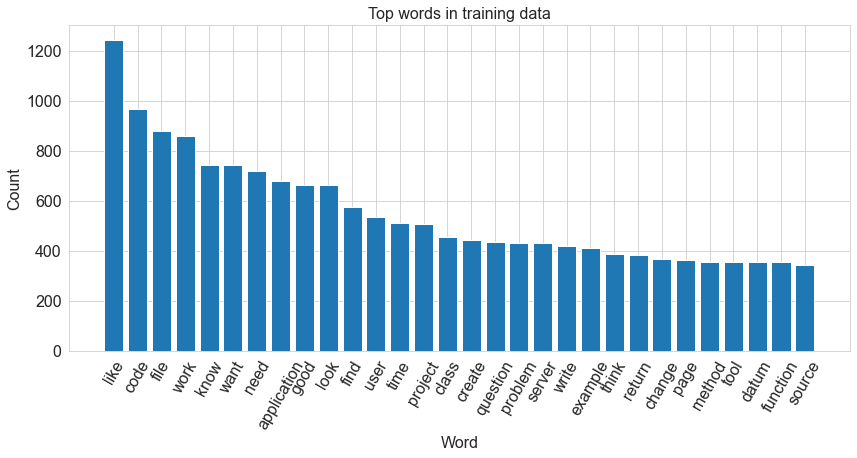

In [29]:
fig = plt.figure(figsize=(14,6))

plt.bar(top_words, top_word_counts)

plt.title("Top words in training data", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.xlabel("Word", fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(rotation = 60, fontsize=16)
plt.show()

We should do all the same stuff for our test data as well.

In [30]:
X_te_bow = bow_transform.transform(test_data['cleaned_body'])

In [31]:
y_tr = training_data['Closed']
y_te = test_data['Closed']

## And now for the logistic regression

In [32]:
def simple_logistic_classify(X_tr, y_tr, X_test, y_test, description, _C=1.0):
    model = LogisticRegression(C=_C, max_iter=1000).fit(X_tr, y_tr)
    score = model.score(X_test, y_test)
    print('Test Score with', description, 'features', score)
    return model

In [33]:
model_bow = simple_logistic_classify(X_tr_bow, y_tr, X_te_bow, y_te, 'bow')

Test Score with bow features 0.675


### Accuracy discussion

From the documentation for LogisticRegression, 'score' returns the mean accuracy on the given test data and labels. We can check this by looking at the actual predictions the normal way.

In [34]:
y_bow_test_pred_proba = model_bow.predict_proba(X_te_bow)

# set a cutoff
cutoff = 0.5

# assign a value based on the cutoff
y_bow_test_cutoff = 1*(y_bow_test_pred_proba[:,1] >= cutoff)

# print the accuracy
print("The test accuracy for a cutoff of",cutoff,
      "is", np.sum(y_bow_test_cutoff == y_te)/len(y_te))

The test accuracy for a cutoff of 0.5 is 0.675


In [35]:
# Plot how the accuracy changes with the cutoff
cutoffs = np.arange(0,1.01,.01)
accs = []

for cutoff in cutoffs:
    y_test_pred = 1*(y_bow_test_pred_proba[:,1] >= cutoff)
    accs.append(np.sum(y_test_pred == y_te)/len(y_te))

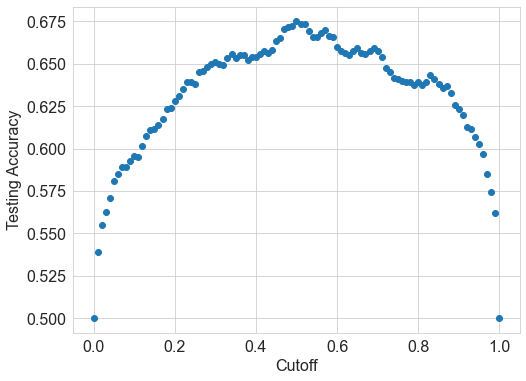

In [36]:
plt.figure(figsize=(8,6))

plt.scatter(cutoffs,accs)

plt.xlabel("Cutoff",fontsize=16)
plt.ylabel("Testing Accuracy",fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()

Unlike in the modeling.ipynb instance, in this plot the testing accuracy actually varies with the chosen cutoff value. That's much better -- an bolsters the previous claim that the high proportion of open questions in that dataset was throwing off our results there. 

We can still look at the equivalent training data plot though.

In [37]:
y_bow_train_pred_proba = model_bow.predict_proba(X_tr_bow)

# set a cutoff
cutoff = 0.5

# assign a value based on the cutoff
y_bow_train_cutoff = 1*(y_bow_train_pred_proba[:,1] >= cutoff)

# print the accuracy
print("The training accuracy for a cutoff of",cutoff,
      "is", np.sum(y_bow_train_cutoff == y_tr)/len(y_tr))

The training accuracy for a cutoff of 0.5 is 0.9846428571428572


Note that the accuracy is *significantly* better for the training data than it was for the testing data.

In [38]:
# Plot how the accuracy changes with the cutoff
cutoffs = np.arange(0,1.01,.01)
accs = []

for cutoff in cutoffs:
    y_train_pred = 1*(y_bow_train_pred_proba[:,1] >= cutoff)
    accs.append(np.sum(y_train_pred == y_tr)/len(y_tr))

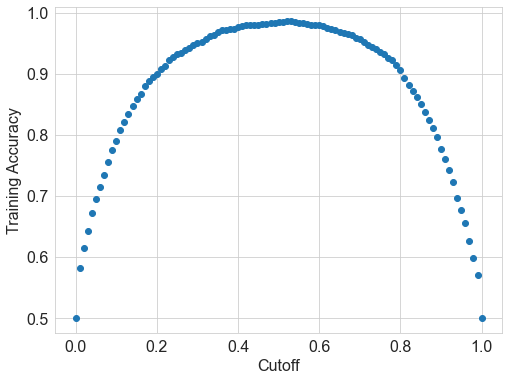

In [39]:
plt.figure(figsize=(8,6))

plt.scatter(cutoffs,accs)

plt.xlabel("Cutoff",fontsize=16)
plt.ylabel("Training Accuracy",fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()

Again, this cutoff plot looks much better.

### Confusion matrix

In [41]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score

We can also look at the confusion matrix to assess how well our predictions are doing.

In [42]:
y_bow_test_pred = model_bow.predict(X_te_bow)

confusion_matrix(y_te, y_bow_test_pred)

array([[402, 198],
       [192, 408]], dtype=int64)

In [43]:
TN = confusion_matrix(y_te, y_bow_test_pred)[0,0]
print("True negatives:", TN)
FP = confusion_matrix(y_te, y_bow_test_pred)[0,1]
print("False positives:", FP)
FN = confusion_matrix(y_te, y_bow_test_pred)[1,0]
print("False negatives:", FN)
TP = confusion_matrix(y_te, y_bow_test_pred)[1,1]
print("True positives:", TP)

print("The testing recall is",
         np.round(TP/(TP+FN),4))

print("The testing precision is",
         np.round(TP/(TP+FP),4))

True negatives: 402
False positives: 198
False negatives: 192
True positives: 408
The testing recall is 0.68
The testing precision is 0.6733


Based on the testing recall value, out of all the closed questions, this model correctly predicted ~68% of them.
Based on the testing precision value, out of all the questions predicted to be closed, ~67% were actually closed.

### Precision-recall curve

We can better capture this precision-recall behavior in a plot.

In [44]:
cutoffs = np.arange(0.001,.975,.001)

prec_scores = []
rec_scores = []

for cutoff in cutoffs:
    pred = 1*(model_bow.predict_proba(X_te_bow)[:,1] >= cutoff)
    
    prec_scores.append(precision_score(y_te, pred))
    rec_scores.append(recall_score(y_te, pred))

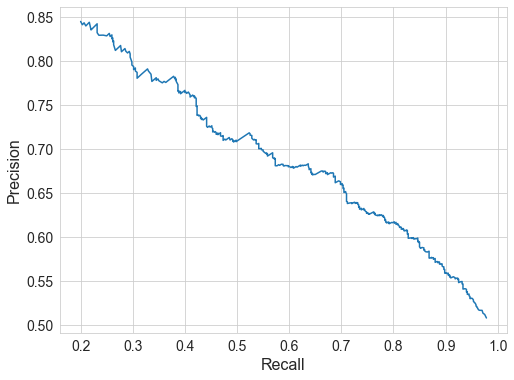

In [45]:
plt.figure(figsize=(8,6))

plt.plot(rec_scores, prec_scores)

plt.xlabel("Recall", fontsize=16)
plt.ylabel("Precision", fontsize=16)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

### ROC curve

This ROC curve is going to tell us if we're doing any better than randomly guessing if questions are closed or open.

In [46]:
from sklearn.metrics import roc_curve

In [47]:
## First input the true values
## Then input the predicted probability for class 1
## the fprs, tprs and cutoffs are returned in that order
fprs, tprs, cutoffs = roc_curve(y_te, model_bow.predict_proba(X_te_bow)[:,1])

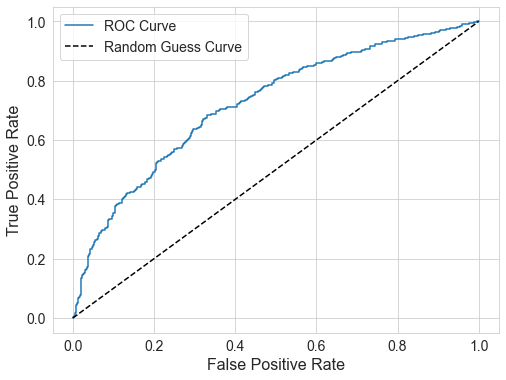

In [48]:
plt.figure(figsize=(8,6))

plt.plot(fprs, tprs, label="ROC Curve")
plt.plot([0,1], [0,1], 'k--', label="Random Guess Curve")


plt.xlabel("False Positive Rate", fontsize=16)
plt.ylabel("True Positive Rate", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

plt.show()

Since the ROC curve is above the random guess curve, yes we are doing better than randomly guessing -- though there is still room for improvement.

### Logistic regression parameters

We can vary the C parameter in the logistic regression to make sure we aren't overfitting. I had to include a max_iter on LogisticRegression() here because the default max_iter=100 wasn't converging.

In [49]:
param_grid_ = {'C': [1e-5, 1e-3, 1e-1, 1e0, 1e1, 1e2]}
bow_search = sklearn.model_selection.GridSearchCV(LogisticRegression(max_iter=1000), cv=5, param_grid=param_grid_)

In [50]:
bow_search.fit(X_tr_bow, y_tr)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [1e-05, 0.001, 0.1, 1.0, 10.0, 100.0]})

In [51]:
bow_search.best_score_

0.7075

In [52]:
bow_search.best_params_

{'C': 0.1}

The best C parameter seems reasonable and is only slightly smaller than the default value (1.0) used above.

In [53]:
bow_search.cv_results_

{'mean_fit_time': array([0.07496009, 0.06941071, 0.11929612, 0.13721056, 0.25618315,
        0.34686208]),
 'std_fit_time': array([0.07575403, 0.06785425, 0.07424253, 0.01194904, 0.06655682,
        0.09026013]),
 'mean_score_time': array([0.00019965, 0.00039907, 0.00019946, 0.00039935, 0.00099869,
        0.00019946]),
 'std_score_time': array([3.99303436e-04, 4.86726853e-04, 3.98921967e-04, 4.89103939e-04,
        2.08298714e-05, 3.98921967e-04]),
 'param_C': masked_array(data=[1e-05, 0.001, 0.1, 1.0, 10.0, 100.0],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1e-05},
  {'C': 0.001},
  {'C': 0.1},
  {'C': 1.0},
  {'C': 10.0},
  {'C': 100.0}],
 'split0_test_score': array([0.63214286, 0.64642857, 0.70535714, 0.70535714, 0.68392857,
        0.66964286]),
 'split1_test_score': array([0.67678571, 0.70178571, 0.7375    , 0.69285714, 0.66428571,
        0.66428571]),
 'split2_test_score': array([0.6732142

In [54]:
search_results = pd.DataFrame.from_dict({'bow': bow_search.cv_results_['mean_test_score']})
search_results

,bow
0,0.647857
1,0.668571
2,0.707500
3,0.688214
4,0.662857
5,0.653571


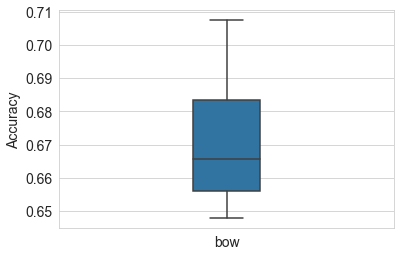

In [55]:
%matplotlib inline
ax = sns.boxplot(data=search_results, width=0.2)
ax.set_ylabel('Accuracy', size=14)
ax.tick_params(labelsize=14)

In [56]:
model_bow = simple_logistic_classify(X_tr_bow, y_tr, X_te_bow, y_te, 'bow', 
                              _C=bow_search.best_params_['C'])

Test Score with bow features 0.6758333333333333
